In [1]:
import matplotlib.pyplot as plt
import glob
import numpy as np

In [2]:
opt_cutoff = {'karate':14, 'football':94, 'jazz':158, 'email':594, 'delaunay_n10':703,'netscience':899, \
              'power':2203,'as-22july06':3303,'hep-th':3926,'star2':4542,'star':6902}

In [33]:
algo = 'GA'
record_time, record_nV = {}, {}
record_time_detail = {}
for fn in glob.glob('./{}_output/power*.trace'.format(algo))[:]:
    sub_detail = {}
    fin = open(fn, 'r').readlines()
    name = fn.split('/')[-1].split('_')[0]
    try:
        if algo == 'approx':
            time, nV = fin[-1].split()
        else:
            time, nV = fin[-1].split()[0].split(',')
    except:
        print (fn)
        continue

    time, nV = float(time), float(nV)
    if name not in record_time:
        record_time[name] = [time]
        record_nV[name] = [nV]
    else:
        record_time[name].append(time)
        record_nV[name].append(nV)
        
#     for i in range(1, len(fin)):
#         time, nV = fin[i].split()[0].split(',')
#         print (time, nV)
print (record_time)
print (record_nV)

{'power': [438.14532, 441.91921, 437.40028, 437.02237, 442.2073, 438.45052, 442.85901, 435.9485, 440.12172, 434.9262]}
{'power': [4128.0, 4116.0, 4132.0, 4144.0, 4107.0, 4135.0, 4122.0, 4130.0, 4134.0, 4144.0]}


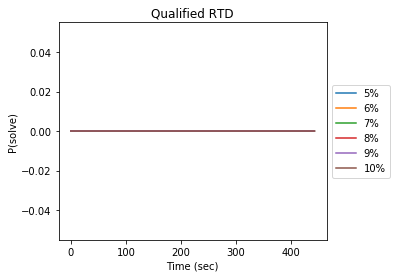

In [34]:
percents = [5,6,7,8,9,10]
maxtime = np.max(record_time['power'])
optimal = opt_cutoff['power']
interval = maxtime/10000.0
x = np.arange(0, maxtime+interval, interval)

# total = float(len(results))
total = 10
fig = plt.figure(1)
ax = fig.add_subplot(111)
# line for each percentage
for p in percents:
    c = optimal + (optimal * p/100.0)
    y = []
    for xval in x:
        num_runs = 0
        num_solutions = 0
#         for q, t in results:

        for fn in glob.glob('./{}_output/power*.trace'.format(algo))[:]:
            num_runs += 1
            fin = open(fn, 'r').readlines()
            name = fn.split('/')[-1].split('_')[0]
            if algo == 'approx':
                time, nV = fin[-1].split()
            else:
                time, nV = fin[-1].split()[0].split(',')
            time, nV = float(time), float(nV)
            # add number of acceptable solutions in the given time
            if time <= xval and nV <= c:
                num_solutions += 1
        y.append(num_solutions/float(num_runs))
    # plot
    ax.plot(x,y,label=str(p)+"%")

# making plot look pretty
ax.set_xlabel('Time (sec)')
ax.set_ylabel('P(solve)')
ax.set_title('Qualified RTD')
handles, labels = ax.get_legend_handles_labels()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*0.8, box.height])
lgd = ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1,0.5))

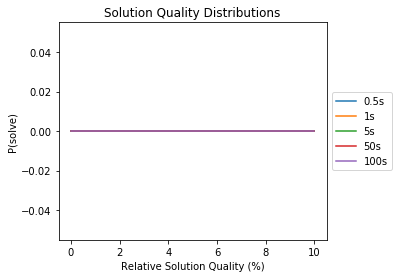

In [35]:
maxquality = 10
interval = maxquality/100.0
times = [0.5,1,5,50,100]

fig = plt.figure(2)
ax = fig.add_subplot(111)
x = np.arange(0, maxquality+interval, interval)

for t in times:
    y = []
    for xval in x:
        c = (xval + 1) * optimal
        num_runs = 0
        num_solutions = 0
        
        for fn in glob.glob('./{}_output/power*.trace'.format(algo))[:]:
            num_runs += 1
            fin = open(fn, 'r').readlines()
            name = fn.split('/')[-1].split('_')[0]
            if algo == 'approx':
                time, nV = fin[-1].split()
            else:
                time, nV = fin[-1].split()[0].split(',')
            time, nV = float(time), float(nV)
            # add number of acceptable solutions in the given time
            if time <= xval and nV <= c:
                num_solutions += 1
                
        y.append(num_solutions/float(num_runs))
    # plot
    ax.plot(x,y,label=str(t)+"s")

# making plot look pretty
ax.set_xlabel('Relative Solution Quality (%)')
ax.set_ylabel('P(solve)')
ax.set_title('Solution Quality Distributions')
handles, labels = ax.get_legend_handles_labels()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*0.8, box.height])
lgd = ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1,0.5))

In [36]:
algo = 'GA'
record_time, record_nV = {}, {}
for fn in glob.glob('./{}_output/*.trace'.format(algo)):

    fin = open(fn, 'r').readlines()
    name = fn.split('/')[-1].split('_')[0]
    try:
        if algo == 'approx':
            time, nV = fin[-1].split()
        else:
            time, nV = fin[-1].split()[0].split(',')
    except:
        print (fn)
        continue

    time, nV = float(time), float(nV)
    if name not in record_time:
        record_time[name] = [time]
        record_nV[name] = [nV]
    else:
        record_time[name].append(time)
        record_nV[name].append(nV)

opt_cutoff = {'karate':14, 'football':94, 'jazz':158, 'email':594, 'delaunay':703,'netscience':899, \
      'power':2203,'as-22july06':3303,'hep-th':3926,'star2':4542,'star':6902}
for key in record_time.keys():
    opt_nv = opt_cutoff.get('{}'.format(key), 1e-15)
    err = (np.mean(record_nV[key]) - opt_nv)/opt_nv
    print ('{}\t{}\t{}\t{}\t{}\t{}\t{}'.format(key, 
                                   np.mean(record_time[key]), np.std(record_time[key]), 
                                   np.mean(record_nV[key]), np.std(record_nV[key]), err, opt_nv))

karate	5.602412000000001	0.043595519907440046	14.0	0.0	0.0	14
jazz	25.024942999999997	0.21319871946379096	164.1	1.445683229480096	0.038607594936708824	158
star2	598.835696	0.3752471887489577	13691.4	8.151073548925934	2.0143989431968294	4542
netscience	134.430244	0.6680641798240681	1013.1	3.7536648758246915	0.12691879866518357	899
star	598.676681	0.29683940002801884	10517.3	4.1	0.5238046942915096	6902
as-22july06	598.975279	0.482429258471108	22651.7	10.060318086422516	5.857917045110506	3303
dummy2	3.034706	0.027306855622718614	3.0	0.0	2999999999999999.0	1e-15
power	438.900043	2.6128315979452212	4129.2	11.061645447219865	0.8743531547889241	2203
dummy1	3.012015	0.0127699406811465	2.0	0.0	1999999999999998.8	1e-15
football	13.627329	0.11541893158836672	97.1	0.9433981132056604	0.032978723404255256	94
email	111.72009700000001	0.5604369802761072	750.9	8.299999999999999	0.2641414141414141	594
hep-th	598.227039	0.05529545088883853	6853.3	10.109896141899776	0.745618950585838	3926
delaunay	97.4446

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1a5b5faed0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1a5ba0e910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1a5b6648d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f1a5b5faa90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1a5b5ca950>,
 'means': []}

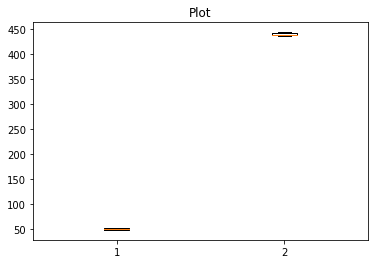

In [37]:
algo = 'SA'
record_time, record_nV = {}, {}
record_time_detail = {}
for fn in glob.glob('./{}_output/power*.trace'.format(algo))[:]:
    sub_detail = {}
    fin = open(fn, 'r').readlines()
    name = fn.split('/')[-1].split('_')[0]
    try:
        if algo == 'approx':
            time, nV = fin[-1].split()
        else:
            time, nV = fin[-1].split()[0].split(',')
    except:
        print (fn)
        continue

    time, nV = float(time), float(nV)
    if name not in record_time:
        record_time[name] = [time]
        record_nV[name] = [nV]
    else:
        record_time[name].append(time)
        record_nV[name].append(nV)
ls1 = np.array(record_time['power'])

algo = 'GA'
record_time, record_nV = {}, {}
record_time_detail = {}
for fn in glob.glob('./{}_output/power*.trace'.format(algo))[:]:
    sub_detail = {}
    fin = open(fn, 'r').readlines()
    name = fn.split('/')[-1].split('_')[0]
    try:
        if algo == 'approx':
            time, nV = fin[-1].split()
        else:
            time, nV = fin[-1].split()[0].split(',')
    except:
        print (fn)
        continue

    time, nV = float(time), float(nV)
    if name not in record_time:
        record_time[name] = [time]
        record_nV[name] = [nV]
    else:
        record_time[name].append(time)
        record_nV[name].append(nV)
ls2 = np.array(record_time['power'])
        
fig1, ax1 = plt.subplots()
ax1.set_title('Plot')
ax1.boxplot([ls1, ls2])